In [16]:
# SARIMA based month ahead forecasting of electricity cost
#Import necessary dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

In [13]:
data = pd.read_csv('price.csv', usecols=[2], engine='python').dropna() # Read data file
original = data['cost'] # Get historical data
original=original[:530].to_numpy()

In [27]:
train=original[:420] # Training data
test=original[420:] # Test data
p =np.zeros(110)
# Train model and predict
for i in range(len(original)-len(train)):
    model = pm.auto_arima(original[i:420+i], start_p=1, start_q=1,
                      test='adf',       # use adf test to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=0, 
                      alpha=0.05,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    p[i]=model.predict(n_periods = 1, return_conf_int=True)[0]

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=212.850, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=409.394, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=62.096, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=225.473, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=407.636, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=271.123, Time=0.10 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-79.517, Time=0.87 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=211.994, Time=0.26 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-78.081, Time=2.01 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-78.072, Time=1.95 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=146.446, Time=0.69 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-76.442, Time=2.46 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-72.399, Time=0.61 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   :

 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=113.828, Time=0.72 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-61.741, Time=1.34 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=-109.228, Time=2.42 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=-111.732, Time=1.31 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-95.155, Time=1.41 sec
 ARIMA(0,1,1)(1,0,1)[12]             : AIC=-114.935, Time=0.59 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=200.505, Time=0.22 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=11.647, Time=0.16 sec
 ARIMA(0,1,1)(2,0,1)[12]             : AIC=-113.074, Time=1.12 sec
 ARIMA(0,1,1)(1,0,2)[12]             : AIC=-113.065, Time=1.18 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=294.849, Time=0.04 sec
 ARIMA(0,1,1)(0,0,2)[12]             : AIC=111.864, Time=0.47 sec
 ARIMA(0,1,1)(2,0,0)[12]             : AIC=-63.741, Time=0.39 sec
 ARIMA(0,1,1)(2,0,2)[12]             : AIC=-111.224, Time=1.20 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=-107.230, Time=0.33 sec
 ARI

 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-114.308, Time=2.72 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-110.975, Time=0.72 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-116.443, Time=1.15 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-118.016, Time=1.23 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-118.769, Time=1.11 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=10.941, Time=0.31 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-116.933, Time=2.07 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-116.902, Time=2.56 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=295.587, Time=0.12 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=110.111, Time=0.70 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-65.557, Time=1.05 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=-115.017, Time=2.49 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=-117.508, Time=1.08 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-117.329, Time=1.58 sec
 ARIMA(0,1,1)(1,0,1)[12]             : AIC=-120.768, Time=0.49 sec


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=195.925, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=393.529, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=246.783, Time=0.17 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-122.794, Time=1.38 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=179.105, Time=0.39 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-120.926, Time=3.16 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-120.917, Time=2.22 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=103.107, Time=0.73 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-119.011, Time=2.46 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-115.653, Time=0.65 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-121.536, Time=1.13 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-123.900, Time=1.31 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2.898, Time=1.04 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=-116.812, Time=3.17 sec
 ARIMA(1

 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-0.809, Time=0.55 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=184.702, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=382.773, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=234.891, Time=0.10 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-136.709, Time=0.86 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=167.763, Time=0.26 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-134.794, Time=2.03 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-131.243, Time=1.90 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=94.416, Time=0.71 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-132.829, Time=2.32 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-128.538, Time=0.75 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-134.885, Time=1.06 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-136.167, Time=1.04 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-137.370, Time=0.89 sec
 ARIMA(0

 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-1.206, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=185.442, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=381.663, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=233.434, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-140.836, Time=0.96 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=168.355, Time=0.26 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-138.847, Time=2.29 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-138.792, Time=2.12 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=94.562, Time=0.66 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-137.000, Time=2.40 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-131.578, Time=0.68 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-138.887, Time=1.13 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-139.055, Time=1.14 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-141.098, Time=1.16 sec
 ARIMA(0

 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=156.077, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=378.094, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-14.406, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=175.115, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=376.430, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=219.353, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-161.002, Time=0.91 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=155.858, Time=0.25 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-159.027, Time=2.07 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-158.686, Time=2.07 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=80.843, Time=0.70 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-157.478, Time=3.09 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-154.176, Time=0.66 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-159.028, Time=1.18 sec
 ARIMA(1,

 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=153.231, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=371.614, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-14.570, Time=0.55 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=171.459, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=369.820, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=216.459, Time=0.11 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-163.238, Time=1.47 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=153.130, Time=0.59 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-161.312, Time=2.44 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-160.581, Time=2.30 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=80.214, Time=0.89 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-159.781, Time=3.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-156.082, Time=0.82 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-161.327, Time=1.25 sec
 ARIMA(1,

 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=150.188, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=366.422, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-14.925, Time=0.35 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=168.716, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=364.676, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=211.281, Time=0.10 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-162.506, Time=1.25 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=150.289, Time=0.28 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-160.547, Time=2.42 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-160.557, Time=2.17 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=77.445, Time=0.64 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-159.001, Time=2.37 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-155.108, Time=0.81 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-160.524, Time=1.23 sec
 ARIMA(1,

 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-170.200, Time=1.60 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-172.455, Time=1.01 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-15.624, Time=0.40 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-170.541, Time=2.16 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-170.539, Time=2.63 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=252.086, Time=0.18 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=79.794, Time=0.99 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-104.066, Time=1.23 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=-168.881, Time=2.72 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=-170.454, Time=1.27 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-160.031, Time=1.41 sec
 ARIMA(0,1,1)(1,0,1)[12]             : AIC=-174.455, Time=0.52 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=163.920, Time=0.15 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=-17.592, Time=0.15 sec
 ARIMA(0,1,1)(2,0,1)[12]             : AIC=-172.540, Time=1.02 sec
 

 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-164.230, Time=0.64 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-171.093, Time=1.17 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-164.641, Time=1.19 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-173.143, Time=1.21 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-15.767, Time=0.40 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-171.314, Time=2.30 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-171.145, Time=2.36 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=252.348, Time=0.13 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=79.660, Time=0.81 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-104.390, Time=0.98 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=-169.693, Time=2.69 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=-171.143, Time=1.09 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-146.017, Time=1.37 sec
 ARIMA(0,1,1)(1,0,1)[12]             : AIC=-175.142, Time=0.48 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=164.522, Time=0.16 sec


 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-175.477, Time=2.10 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=248.223, Time=0.09 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=76.478, Time=0.75 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-109.082, Time=0.92 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=-173.941, Time=2.53 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=-175.408, Time=1.12 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-151.068, Time=1.33 sec
 ARIMA(0,1,1)(1,0,1)[12]             : AIC=-179.402, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=160.719, Time=0.15 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=-22.067, Time=0.18 sec
 ARIMA(0,1,1)(2,0,1)[12]             : AIC=-177.552, Time=0.92 sec
 ARIMA(0,1,1)(1,0,2)[12]             : AIC=-177.549, Time=0.98 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=246.318, Time=0.04 sec
 ARIMA(0,1,1)(0,0,2)[12]             : AIC=74.542, Time=0.50 sec
 ARIMA(0,1,1)(2,0,0)[12]             : AIC=-111.082, Time=0.46 sec
 AR

 ARIMA(1,1,0)(2,0,0)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(1,1,0)(2,0,2)[12]             : AIC=-179.057, Time=1.96 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=-172.820, Time=0.35 sec
 ARIMA(2,1,0)(1,0,1)[12]             : AIC=-180.556, Time=0.78 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-180.569, Time=0.79 sec
 ARIMA(0,1,1)(1,0,1)[12]             : AIC=-182.519, Time=0.49 sec
 ARIMA(2,1,1)(1,0,1)[12]             : AIC=-180.107, Time=1.08 sec

Best model:  ARIMA(1,1,0)(1,0,1)[12]          
Total fit time: 27.039 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=141.081, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=352.329, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-18.718, Time=0.39 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=159.354, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=350.499, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=201.641, Time=0.17 sec
 ARIMA(1,1,0)(2,0,

 ARIMA(1,1,2)(1,0,1)[12]             : AIC=-176.139, Time=0.98 sec

Best model:  ARIMA(0,1,1)(1,0,1)[12]          
Total fit time: 35.446 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=138.568, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=350.274, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-21.718, Time=0.45 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=157.353, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=348.460, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=200.171, Time=0.10 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-181.446, Time=0.97 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=139.313, Time=0.20 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-179.484, Time=2.18 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-179.587, Time=2.53 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=73.159, Time=0.64 sec
 ARIMA(1,1,0)(2,0,2)[

 ARIMA(1,1,0)(1,0,0)[12]             : AIC=-25.639, Time=0.16 sec
 ARIMA(1,1,0)(2,0,1)[12]             : AIC=-183.732, Time=1.31 sec
 ARIMA(1,1,0)(1,0,2)[12]             : AIC=-183.734, Time=1.02 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=195.763, Time=0.03 sec
 ARIMA(1,1,0)(0,0,2)[12]             : AIC=69.598, Time=0.53 sec
 ARIMA(1,1,0)(2,0,0)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(1,1,0)(2,0,2)[12]             : AIC=-181.773, Time=1.25 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=-175.126, Time=0.34 sec
 ARIMA(2,1,0)(1,0,1)[12]             : AIC=-183.652, Time=0.56 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-183.653, Time=0.83 sec
 ARIMA(0,1,1)(1,0,1)[12]             : AIC=-185.409, Time=0.49 sec
 ARIMA(2,1,1)(1,0,1)[12]             : AIC=-181.651, Time=0.76 sec

Best model:  ARIMA(1,1,0)(1,0,1)[12]          
Total fit time: 25.328 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=133.488, Time=0.43 sec
 ARIMA(0,1,0)(0,0

 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-182.635, Time=2.51 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-184.594, Time=3.27 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=64.232, Time=0.81 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-183.227, Time=2.97 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-176.352, Time=0.75 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-184.432, Time=1.10 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-181.975, Time=0.98 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-186.045, Time=0.92 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-28.644, Time=0.32 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-184.190, Time=2.12 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-184.184, Time=2.12 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=238.235, Time=0.13 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=68.609, Time=0.63 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-119.737, Time=1.06 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=-182.848, Time=2.20 sec
 

 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-184.215, Time=1.53 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-188.451, Time=1.41 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=-184.504, Time=1.31 sec
 ARIMA(1,1,0)(1,0,1)[12]             : AIC=-190.739, Time=0.53 sec
 ARIMA(1,1,0)(0,0,1)[12]             : AIC=129.645, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=-30.619, Time=0.24 sec
 ARIMA(1,1,0)(2,0,1)[12]             : AIC=-189.040, Time=1.27 sec
 ARIMA(1,1,0)(1,0,2)[12]             : AIC=-189.028, Time=1.51 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=188.212, Time=0.04 sec
 ARIMA(1,1,0)(0,0,2)[12]             : AIC=60.700, Time=0.51 sec
 ARIMA(1,1,0)(2,0,0)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(1,1,0)(2,0,2)[12]             : AIC=-187.870, Time=1.91 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=-180.116, Time=0.35 sec
 ARIMA(2,1,0)(1,0,1)[12]             : AIC=-188.751, Time=0.79 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-188.761, Time=1.01 sec
 ARIM

 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-188.708, Time=0.91 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=129.815, Time=0.22 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-187.129, Time=2.24 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-187.116, Time=2.32 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=60.744, Time=0.64 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-185.855, Time=3.14 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-178.454, Time=0.57 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-186.769, Time=1.14 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-184.632, Time=1.26 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-187.432, Time=1.01 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=-184.618, Time=1.28 sec
 ARIMA(1,1,0)(1,0,1)[12]             : AIC=-190.738, Time=0.48 sec
 ARIMA(1,1,0)(0,0,1)[12]             : AIC=127.901, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=-30.879, Time=0.18 sec
 ARIM

 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-186.176, Time=0.71 sec
 ARIMA(0,1,1)(1,0,1)[12]             : AIC=-188.920, Time=0.42 sec
 ARIMA(2,1,1)(1,0,1)[12]             : AIC=-185.502, Time=0.97 sec

Best model:  ARIMA(1,1,0)(1,0,1)[12]          
Total fit time: 26.766 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=129.316, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=331.191, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-29.465, Time=0.44 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=147.853, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=329.321, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=188.497, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-187.710, Time=0.77 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=130.650, Time=0.29 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-186.234, Time=2.09 sec
 ARIMA(1,1,0)(1,0,2

 ARIMA(1,1,0)(1,0,1)[12]             : AIC=-193.611, Time=0.53 sec
 ARIMA(1,1,0)(0,0,1)[12]             : AIC=128.372, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=-31.375, Time=0.23 sec
 ARIMA(1,1,0)(2,0,1)[12]             : AIC=-192.320, Time=1.40 sec
 ARIMA(1,1,0)(1,0,2)[12]             : AIC=-192.288, Time=1.46 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=185.881, Time=0.06 sec
 ARIMA(1,1,0)(0,0,2)[12]             : AIC=56.899, Time=1.10 sec
 ARIMA(1,1,0)(2,0,0)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(1,1,0)(2,0,2)[12]             : AIC=-191.227, Time=1.70 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=-180.809, Time=0.36 sec
 ARIMA(2,1,0)(1,0,1)[12]             : AIC=-191.615, Time=0.74 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-190.902, Time=1.09 sec
 ARIMA(0,1,1)(1,0,1)[12]             : AIC=-193.440, Time=0.49 sec
 ARIMA(2,1,1)(1,0,1)[12]             : AIC=-192.192, Time=1.36 sec

Best model:  ARIMA(1,1,0)(1,0,1)[12]          
Total fit time: 26.558 s

 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-186.736, Time=1.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=129.867, Time=0.28 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-185.330, Time=1.99 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-185.301, Time=2.07 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=54.733, Time=0.67 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-183.990, Time=3.60 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-173.048, Time=0.92 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-184.738, Time=1.12 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-182.266, Time=1.12 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-186.288, Time=0.84 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=-182.649, Time=1.19 sec
 ARIMA(1,1,0)(1,0,1)[12]             : AIC=-188.734, Time=0.45 sec
 ARIMA(1,1,0)(0,0,1)[12]             : AIC=128.043, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=-34.446, Time=0.19 sec
 ARIMA(1,1,0)(2,0,1)[12]             : AIC=-187.328, Time=0.98 sec


 ARIMA(0,1,1)(1,0,1)[12]             : AIC=-188.355, Time=0.53 sec
 ARIMA(2,1,1)(1,0,1)[12]             : AIC=-187.090, Time=1.13 sec

Best model:  ARIMA(1,1,0)(1,0,1)[12]          
Total fit time: 31.451 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=132.110, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=320.811, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-29.599, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=146.794, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=319.075, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=190.661, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-182.945, Time=0.86 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=133.192, Time=0.25 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-182.092, Time=2.32 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-182.050, Time=1.94 sec
 ARIMA(1,1,0)(0,0,2

 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-188.008, Time=1.05 sec
 ARIMA(0,1,2)(1,0,1)[12]             : AIC=-187.992, Time=0.78 sec
 ARIMA(1,1,0)(1,0,1)[12]             : AIC=-189.633, Time=0.61 sec
 ARIMA(1,1,2)(1,0,1)[12]             : AIC=-187.757, Time=1.55 sec

Best model:  ARIMA(0,1,1)(1,0,1)[12]          
Total fit time: 38.131 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=131.844, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=321.239, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-30.583, Time=0.49 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=145.253, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=319.627, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=195.562, Time=0.12 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-182.689, Time=1.18 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=133.330, Time=0.25 sec
 ARIMA(1,1,0)(2,0,1

 ARIMA(0,1,1)(2,0,2)[12]             : AIC=-179.670, Time=2.36 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=-163.902, Time=0.62 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-180.350, Time=0.90 sec
 ARIMA(0,1,2)(1,0,1)[12]             : AIC=-180.345, Time=0.84 sec
 ARIMA(1,1,0)(1,0,1)[12]             : AIC=-181.399, Time=0.45 sec
 ARIMA(1,1,2)(1,0,1)[12]             : AIC=-180.393, Time=1.03 sec

Best model:  ARIMA(0,1,1)(1,0,1)[12]          
Total fit time: 38.354 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=132.493, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=320.412, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-32.598, Time=0.39 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=144.992, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=318.913, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=198.094, Time=0.09 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(1,1,0)(1,0,

 ARIMA(0,1,1)(0,0,2)[12]             : AIC=61.490, Time=0.47 sec
 ARIMA(0,1,1)(2,0,0)[12]             : AIC=-129.230, Time=0.30 sec
 ARIMA(0,1,1)(2,0,2)[12]             : AIC=-179.856, Time=2.07 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=-163.935, Time=0.47 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-180.453, Time=1.10 sec
 ARIMA(0,1,2)(1,0,1)[12]             : AIC=-180.444, Time=1.05 sec
 ARIMA(1,1,0)(1,0,1)[12]             : AIC=-181.407, Time=0.57 sec
 ARIMA(1,1,2)(1,0,1)[12]             : AIC=-180.537, Time=1.63 sec

Best model:  ARIMA(0,1,1)(1,0,1)[12]          
Total fit time: 37.852 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=132.675, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=320.421, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-31.302, Time=0.42 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=144.973, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=318.946, Time=0.03 sec
 ARIMA(1,1,0)(

 ARIMA(0,1,1)(1,0,2)[12]             : AIC=-182.703, Time=0.96 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=230.207, Time=0.04 sec
 ARIMA(0,1,1)(0,0,2)[12]             : AIC=57.466, Time=0.52 sec
 ARIMA(0,1,1)(2,0,0)[12]             : AIC=-130.025, Time=0.48 sec
 ARIMA(0,1,1)(2,0,2)[12]             : AIC=-180.877, Time=2.43 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=-164.539, Time=0.39 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-181.462, Time=0.81 sec
 ARIMA(0,1,2)(1,0,1)[12]             : AIC=-181.391, Time=0.63 sec
 ARIMA(1,1,0)(1,0,1)[12]             : AIC=-182.035, Time=0.64 sec
 ARIMA(1,1,2)(1,0,1)[12]             : AIC=-181.602, Time=2.57 sec

Best model:  ARIMA(0,1,1)(1,0,1)[12]          
Total fit time: 39.953 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=128.803, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=316.096, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-34.141, Time=0.48 sec
 ARIMA(0,1,1)

 ARIMA(0,1,1)(1,0,0)[12]             : AIC=-40.687, Time=0.16 sec
 ARIMA(0,1,1)(2,0,1)[12]             : AIC=-189.520, Time=1.14 sec
 ARIMA(0,1,1)(1,0,2)[12]             : AIC=-189.649, Time=0.79 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=232.288, Time=0.04 sec
 ARIMA(0,1,1)(0,0,2)[12]             : AIC=58.574, Time=0.44 sec
 ARIMA(0,1,1)(2,0,0)[12]             : AIC=-133.650, Time=0.67 sec
 ARIMA(0,1,1)(2,0,2)[12]             : AIC=-187.135, Time=1.73 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=-169.405, Time=0.47 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-188.377, Time=0.86 sec
 ARIMA(0,1,2)(1,0,1)[12]             : AIC=-188.339, Time=1.14 sec
 ARIMA(1,1,0)(1,0,1)[12]             : AIC=-188.540, Time=0.52 sec
 ARIMA(1,1,2)(1,0,1)[12]             : AIC=-188.808, Time=1.29 sec

Best model:  ARIMA(0,1,1)(1,0,1)[12]          
Total fit time: 38.280 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=126.324, Time=0.44 sec
 ARIMA(0,1,0

 ARIMA(0,1,1)(1,0,1)[12]             : AIC=-194.623, Time=0.44 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=134.157, Time=0.14 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=-40.571, Time=0.15 sec
 ARIMA(0,1,1)(2,0,1)[12]             : AIC=-194.332, Time=0.95 sec
 ARIMA(0,1,1)(1,0,2)[12]             : AIC=-194.513, Time=0.97 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=226.168, Time=0.08 sec
 ARIMA(0,1,1)(0,0,2)[12]             : AIC=57.479, Time=0.39 sec
 ARIMA(0,1,1)(2,0,0)[12]             : AIC=-137.857, Time=0.37 sec
 ARIMA(0,1,1)(2,0,2)[12]             : AIC=-192.840, Time=1.96 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=-174.587, Time=0.28 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-192.858, Time=0.68 sec
 ARIMA(0,1,2)(1,0,1)[12]             : AIC=-192.796, Time=0.50 sec
 ARIMA(1,1,0)(1,0,1)[12]             : AIC=-192.698, Time=0.57 sec
 ARIMA(1,1,2)(1,0,1)[12]             : AIC=-193.185, Time=0.84 sec

Best model:  ARIMA(0,1,1)(1,0,1)[12]          
Total fit time: 36.

 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=-172.788, Time=1.91 sec
 ARIMA(0,1,2)(1,0,2)[12] intercept   : AIC=-189.488, Time=2.81 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=-128.659, Time=3.71 sec
 ARIMA(0,1,1)(1,0,2)[12]             : AIC=-192.935, Time=1.15 sec
 ARIMA(0,1,1)(0,0,2)[12]             : AIC=57.126, Time=0.39 sec
 ARIMA(0,1,1)(1,0,1)[12]             : AIC=-192.674, Time=0.44 sec
 ARIMA(0,1,1)(2,0,2)[12]             : AIC=-191.223, Time=1.82 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=134.102, Time=0.16 sec
 ARIMA(0,1,1)(2,0,1)[12]             : AIC=-192.726, Time=1.00 sec
 ARIMA(0,1,0)(1,0,2)[12]             : AIC=-174.756, Time=0.72 sec
 ARIMA(1,1,1)(1,0,2)[12]             : AIC=-191.939, Time=1.77 sec
 ARIMA(0,1,2)(1,0,2)[12]             : AIC=-191.545, Time=1.07 sec
 ARIMA(1,1,0)(1,0,2)[12]             : AIC=-190.623, Time=0.78 sec
 ARIMA(1,1,2)(1,0,2)[12]             : AIC=inf, Time=1.55 sec

Best model:  ARIMA(0,1,1)(1,0,2)[12]          
Total fit time: 58.731

 ARIMA(4,1,3)(2,0,0)[12]             : AIC=-172.756, Time=3.27 sec
 ARIMA(4,1,3)(2,0,2)[12]             : AIC=-208.373, Time=5.43 sec
 ARIMA(3,1,3)(1,0,1)[12]             : AIC=-188.278, Time=1.69 sec
 ARIMA(4,1,2)(1,0,1)[12]             : AIC=inf, Time=2.12 sec
 ARIMA(5,1,3)(1,0,1)[12]             : AIC=-215.106, Time=2.33 sec
 ARIMA(5,1,3)(0,0,1)[12]             : AIC=-136.694, Time=1.53 sec
 ARIMA(5,1,3)(1,0,0)[12]             : AIC=inf, Time=1.64 sec
 ARIMA(5,1,3)(2,0,1)[12]             : AIC=-213.838, Time=4.77 sec
 ARIMA(5,1,3)(1,0,2)[12]             : AIC=-213.331, Time=4.22 sec
 ARIMA(5,1,3)(0,0,0)[12]             : AIC=-119.935, Time=0.86 sec
 ARIMA(5,1,3)(0,0,2)[12]             : AIC=-154.125, Time=3.30 sec
 ARIMA(5,1,3)(2,0,0)[12]             : AIC=inf, Time=3.82 sec
 ARIMA(5,1,3)(2,0,2)[12]             : AIC=-199.547, Time=5.66 sec
 ARIMA(5,1,2)(1,0,1)[12]             : AIC=-190.124, Time=2.23 sec
 ARIMA(5,1,4)(1,0,1)[12]             : AIC=inf, Time=3.04 sec
 ARIMA(4,1,4)(1

 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=53.080, Time=0.82 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-137.140, Time=1.17 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=-188.942, Time=4.58 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=-190.049, Time=1.66 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-181.569, Time=1.71 sec
 ARIMA(0,1,1)(1,0,1)[12]             : AIC=-193.757, Time=0.78 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=131.979, Time=0.25 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=-40.655, Time=0.20 sec
 ARIMA(0,1,1)(2,0,1)[12]             : AIC=-193.601, Time=1.07 sec
 ARIMA(0,1,1)(1,0,2)[12]             : AIC=-193.738, Time=1.75 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=220.999, Time=0.11 sec
 ARIMA(0,1,1)(0,0,2)[12]             : AIC=51.246, Time=0.62 sec
 ARIMA(0,1,1)(2,0,0)[12]             : AIC=-139.103, Time=0.50 sec
 ARIMA(0,1,1)(2,0,2)[12]             : AIC=-191.957, Time=2.74 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=-173.890, Time=0.59 sec
 A

 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-189.138, Time=2.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-175.224, Time=1.01 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-187.811, Time=1.23 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-193.453, Time=1.01 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-48.646, Time=0.82 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=-193.322, Time=2.40 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=-193.108, Time=3.21 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=187.623, Time=0.17 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=43.115, Time=1.24 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=-140.071, Time=2.60 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=-190.040, Time=3.62 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-194.644, Time=1.00 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-50.500, Time=0.34 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-193.757, Time=2.52 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-193.825, Time=2.53 sec


 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-195.738, Time=1.00 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=106.622, Time=0.50 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-194.196, Time=2.50 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-194.361, Time=3.03 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=39.223, Time=0.79 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-192.270, Time=2.67 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-175.577, Time=0.98 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-196.342, Time=1.45 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=99.387, Time=0.40 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=-50.114, Time=0.64 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=-195.401, Time=3.16 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=-195.459, Time=2.93 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=182.175, Time=0.14 sec
 ARIMA(2,1,0)(0,0,2)[12] intercept   : AIC=34.177, Time=1.14 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.06 sec
 ARIMA(2,

 ARIMA(0,1,1)(0,0,2)[12]             : AIC=38.741, Time=0.51 sec
 ARIMA(0,1,1)(2,0,0)[12]             : AIC=-144.922, Time=0.54 sec
 ARIMA(0,1,1)(2,0,2)[12]             : AIC=-199.517, Time=2.77 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=-178.841, Time=0.44 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-200.640, Time=1.04 sec
 ARIMA(0,1,2)(1,0,1)[12]             : AIC=-200.451, Time=0.82 sec
 ARIMA(1,1,0)(1,0,1)[12]             : AIC=-199.388, Time=0.57 sec
 ARIMA(1,1,2)(1,0,1)[12]             : AIC=-200.643, Time=1.45 sec

Best model:  ARIMA(0,1,1)(1,0,1)[12]          
Total fit time: 84.862 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=104.499, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=291.936, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-52.136, Time=0.42 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=115.760, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=290.839, Time=0.08 sec
 ARIMA(1,1,0)(

 ARIMA(1,1,0)(1,0,1)[12]             : AIC=-199.447, Time=0.66 sec
 ARIMA(1,1,2)(1,0,1)[12]             : AIC=-202.032, Time=1.60 sec

Best model:  ARIMA(0,1,1)(1,0,1)[12]          
Total fit time: 79.495 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=103.096, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=283.582, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-52.114, Time=0.59 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=114.334, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=282.293, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=176.659, Time=0.12 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-202.728, Time=1.16 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=105.129, Time=0.46 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-201.620, Time=2.65 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-202.345, Time=2.68 sec
 ARIMA(1,1,0)(0,0,2

 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-207.122, Time=1.92 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-76.617, Time=1.22 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=-205.617, Time=3.39 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=-206.593, Time=3.81 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=175.640, Time=0.68 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=28.687, Time=1.90 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=-158.959, Time=2.87 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=-204.786, Time=4.86 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-207.810, Time=1.55 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-65.549, Time=0.70 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-206.597, Time=3.85 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-207.429, Time=3.84 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=203.890, Time=0.15 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=30.648, Time=1.04 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-154.444, Time=1.45 sec
 AR

 ARIMA(0,1,1)(1,0,2)[12]             : AIC=-213.656, Time=1.29 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=199.885, Time=0.05 sec
 ARIMA(0,1,1)(0,0,2)[12]             : AIC=22.014, Time=0.60 sec
 ARIMA(0,1,1)(2,0,0)[12]             : AIC=-161.082, Time=0.44 sec
 ARIMA(0,1,1)(2,0,2)[12]             : AIC=-211.871, Time=2.58 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=-197.269, Time=0.41 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-214.653, Time=1.19 sec
 ARIMA(0,1,2)(1,0,1)[12]             : AIC=-213.333, Time=0.74 sec
 ARIMA(1,1,0)(1,0,1)[12]             : AIC=-213.170, Time=0.48 sec
 ARIMA(1,1,2)(1,0,1)[12]             : AIC=-216.553, Time=1.40 sec
 ARIMA(1,1,2)(0,0,1)[12]             : AIC=80.224, Time=0.53 sec
 ARIMA(1,1,2)(1,0,0)[12]             : AIC=-90.840, Time=0.73 sec
 ARIMA(1,1,2)(2,0,1)[12]             : AIC=-215.160, Time=2.66 sec
 ARIMA(1,1,2)(1,0,2)[12]             : AIC=-214.181, Time=3.46 sec
 ARIMA(1,1,2)(0,0,0)[12]             : AIC=186.422, Time=0.37 sec
 A

 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=17.843, Time=0.98 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-212.754, Time=3.09 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-198.519, Time=1.42 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-216.936, Time=1.45 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=80.620, Time=0.77 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=-77.343, Time=0.96 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=-215.454, Time=4.42 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=-215.510, Time=3.81 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=169.597, Time=0.22 sec
 ARIMA(2,1,0)(0,0,2)[12] intercept   : AIC=14.176, Time=1.34 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=2.49 sec
 ARIMA(2,1,0)(2,0,2)[12] intercept   : AIC=-213.371, Time=5.39 sec
 ARIMA(3,1,0)(1,0,1)[12] intercept   : AIC=-215.053, Time=2.21 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=-215.362, Time=2.04 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-217.805, Time=1.83 sec
 ARIMA(1

 ARIMA(3,1,0)(1,0,1)[12] intercept   : AIC=-214.109, Time=1.89 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=-214.453, Time=1.52 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-216.717, Time=1.31 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-85.129, Time=0.84 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=-213.246, Time=2.79 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=-214.127, Time=2.92 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=165.951, Time=0.20 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=10.087, Time=1.99 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=-169.166, Time=2.62 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=-213.507, Time=2.86 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-218.083, Time=1.20 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-87.061, Time=0.36 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-216.289, Time=2.14 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=-216.301, Time=2.23 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=193.935, Time=0.26 sec
 

 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-215.295, Time=0.92 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=79.622, Time=0.29 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=-213.338, Time=2.35 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=-213.368, Time=2.44 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=10.658, Time=0.84 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=-211.455, Time=2.87 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-196.662, Time=0.73 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-215.984, Time=1.30 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=73.664, Time=0.37 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=-85.152, Time=0.63 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=-210.391, Time=2.86 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=-213.513, Time=2.89 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=165.593, Time=0.13 sec
 ARIMA(2,1,0)(0,0,2)[12] intercept   : AIC=6.707, Time=1.13 sec
 ARIMA(2,1,

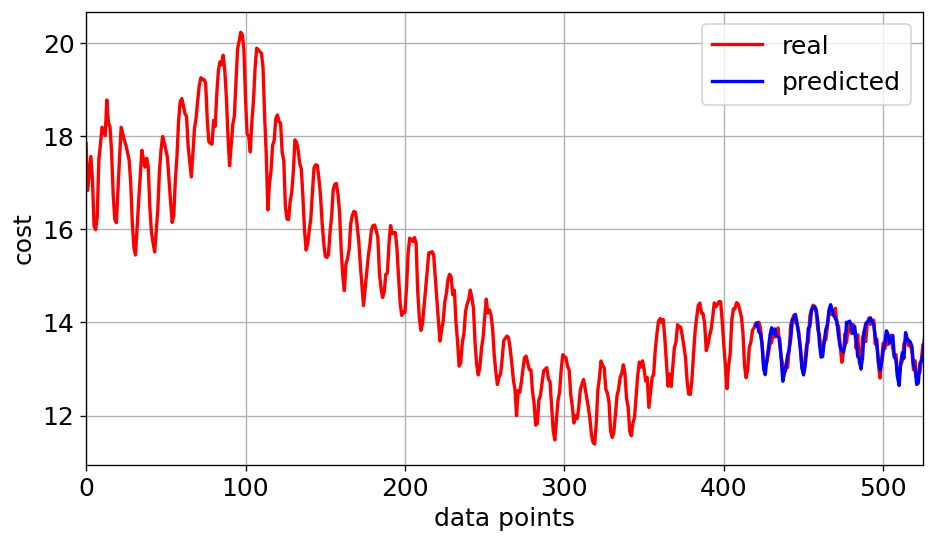

In [67]:
index_of_fc = range(420,530)

# make series for plotting purpose
fc_series = pd.Series(p, index=index_of_fc)

# Plot

plt.plot(original,'r',lw =2)
plt.plot(fc_series, color='b',lw=2)
plt.xlim([0,525])
plt.xlabel('data points', fontsize =15)
plt.ylabel('cost',fontsize =15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['real','predicted'],prop={'size': 15})
plt.grid()
plt.savefig('arima', dpi=300)

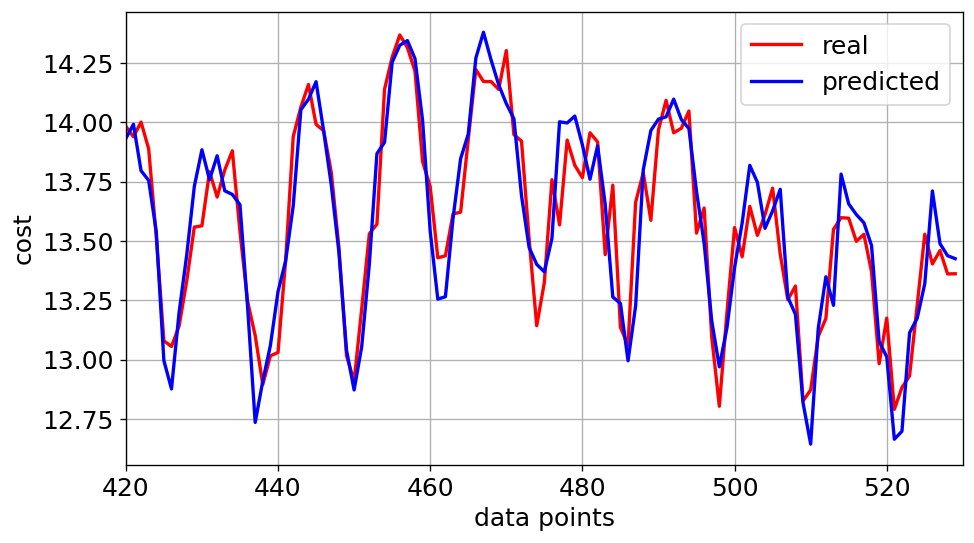

In [69]:
plt.plot(range(420,530),original[420:530],'r',lw=2)
plt.plot(range(420,530),p, color='b',lw=2)
plt.xlim([420,530])
plt.xlabel('data points', fontsize =15)
plt.ylabel('cost', fontsize =15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['real','predicted'],prop={'size': 15})
plt.grid()
plt.savefig('zoomedarima', dpi=300)


In [35]:
rmse = (np.sum((original[420:530]-p)**2)/len(p))**(1/2)
rmse

0.16805390011893048